In [5]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix

In [6]:
from keras.datasets import mnist #dataset

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [8]:
type(X_train)

numpy.ndarray

In [10]:
#shape of data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [11]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

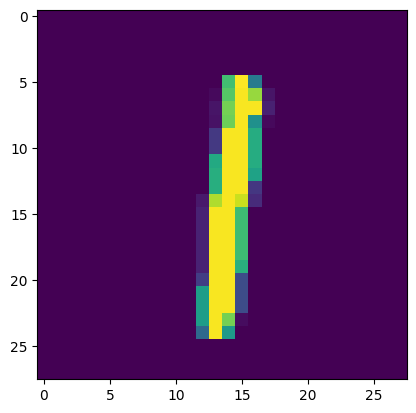

1


In [17]:
plt.imshow(X_train[40])
plt.show()
print(Y_train[40])

In [18]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Building the neural network

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),  #input layer
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid') # output layer
     ])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
#compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [79]:
#train our model

history = model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9909 - loss: 0.0292
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.9916 - loss: 0.0269
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.9935 - loss: 0.0205
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.9928 - loss: 0.0218
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.9930 - loss: 0.0210
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.9934 - loss: 0.0191
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.9948 - loss: 0.0153
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9950 - loss: 0.0157
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.9943 - loss: 0.0161
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.9953 - loss: 0.0136
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9951 - loss: 0.0146
Epoch 12

In [80]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.9675 - loss: 0.3045


In [81]:
print(f"Loss is :{loss*100}%")
print(f"Accuracy is :{accuracy*100}%")

Loss is :26.42088532447815%
Accuracy is :97.2599983215332%


In [82]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


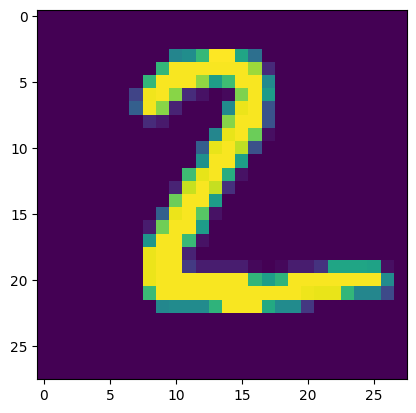

In [83]:
plt.imshow(X_test[1])
plt.show()

In [84]:
print(Y_pred[1])

[1.5129901e-18 1.0000000e+00 1.0000000e+00 3.7131169e-01 1.8078220e-34
 6.1625066e-11 1.4981997e-12 1.5428570e-15 7.8271427e-07 0.0000000e+00]


model.predict() will return the probabilities of class label

In [86]:
#convert prediction prob to class label
label_img = np.argmax(Y_pred[1])
print(label_img)

1


In [50]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [87]:
#confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [88]:
print(conf_mat)

tf.Tensor(
[[ 965    0    0    1    1    2    3    0    2    6]
 [   0 1120    3    1    0    1    4    1    4    1]
 [   9    2  988    6    2    1    6    4   11    3]
 [   0    0    4  989    0    5    0    3    4    5]
 [   0    1    5    0  942    3   10    1    5   15]
 [   3    0    1   18    2  860    2    1    4    1]
 [   5    2    1    1    3    8  937    0    1    0]
 [   3    4   14    2    0    0    1  979    4   21]
 [   2    0    4    4    2   10    5    2  942    3]
 [   2    2    0    3    5    7    0    1    9  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

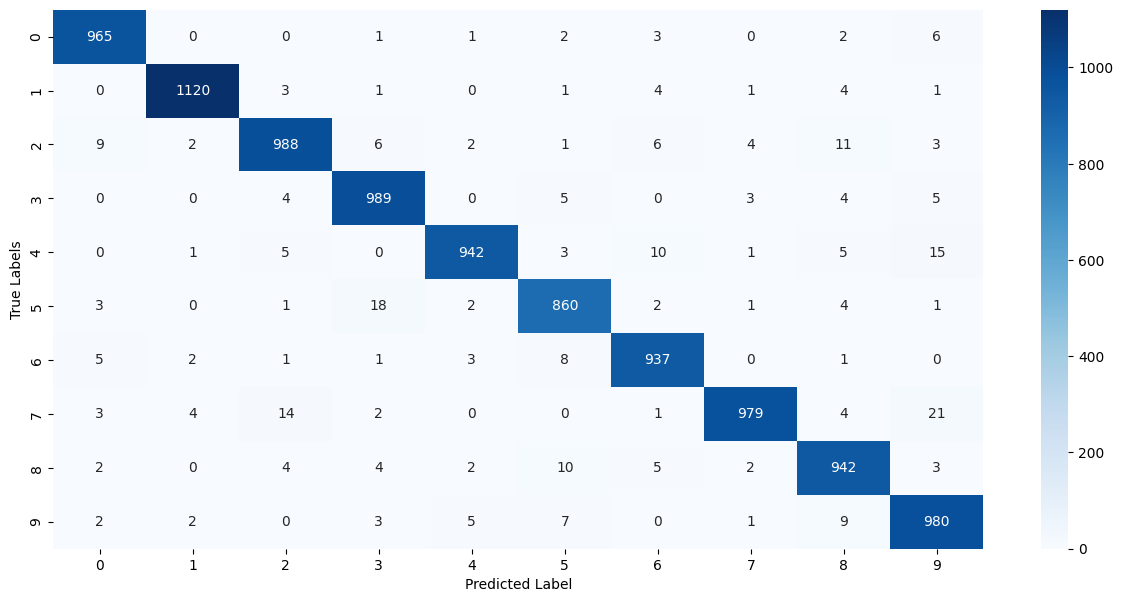

In [89]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The Handwritten Digit is recognised as  3


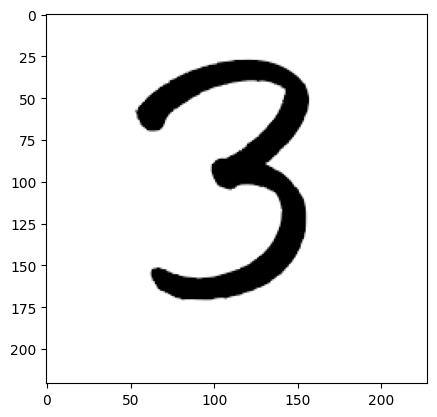

In [105]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Convert to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Resize to 28x28
input_image_resize = cv2.resize(grayscale, (28, 28))

# Invert colors if the image has black background and white digit
if np.mean(input_image_resize) > 127:  # Check if the background is light
    input_image_resize = 255 - input_image_resize

# Normalize pixel values
input_image_resize = input_image_resize / 255.0

# Reshape for model input
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

# Predict
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)
plt.imshow(input_image)